# f1. Mutual Information

In [17]:
import os
import pandas as pd

In [18]:
DATA_PATH = '../../data/'
train = pd.read_csv(os.path.join(DATA_PATH, 'train_2.csv'), index_col=0)
test = pd.read_csv(os.path.join(DATA_PATH, 'test_2.csv'), index_col=0)

# train_origin = train.copy()
# test_origin = test.copy()

train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,0.000218,0.712247,0.000169,0.115591,38.458553,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


## 1) Mutual Information 계산하기

In [19]:
from sklearn.feature_selection import mutual_info_regression

In [20]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [21]:
X = train.copy()
X = X.drop('ID_LAT_LON_YEAR_WEEK', axis=1)
y = X.pop('emission')

discrete_features = X.dtypes == int

In [22]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

latitude                                         2.243172
longitude                                        2.226911
NitrogenDioxide_tropopause_pressure              0.106448
Ozone_sensor_azimuth_angle                       0.044010
UvAerosolIndex_sensor_azimuth_angle              0.043269
                                                   ...   
NitrogenDioxide_solar_zenith_angle               0.003135
Formaldehyde_HCHO_slant_column_number_density    0.002588
Cloud_solar_zenith_angle                         0.002395
Formaldehyde_cloud_fraction                      0.001798
SulphurDioxide_solar_zenith_angle                0.001742
Name: MI Scores, Length: 67, dtype: float64

## 2) MI 스코어 bar plot

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

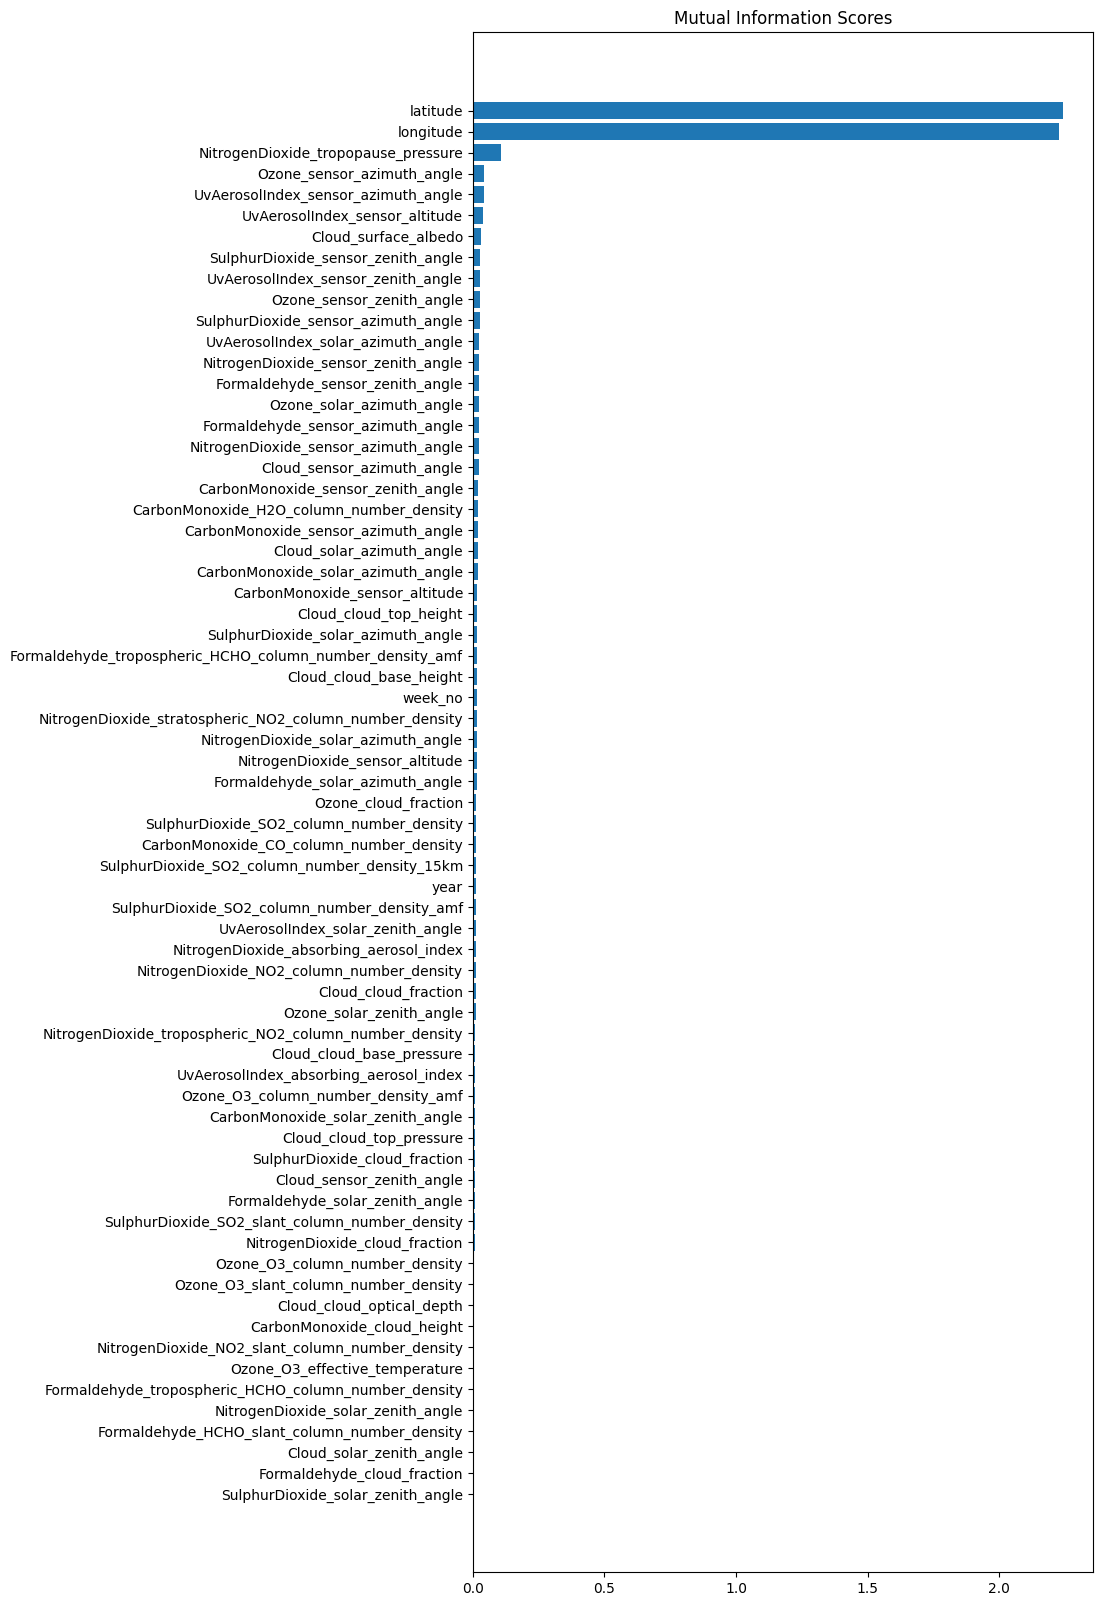

In [25]:
plt.figure(dpi=100, figsize=(8, 20))
plot_mi_scores(mi_scores)

## 3) MI 스코어 기반 feature selection
- MI 스코어가 0.01 이상인 칼럼만 추출

In [26]:
drop_columns = list(mi_scores.loc[mi_scores < 0.01].index)
drop_columns

['NitrogenDioxide_tropospheric_NO2_column_number_density',
 'Cloud_cloud_base_pressure',
 'UvAerosolIndex_absorbing_aerosol_index',
 'Ozone_O3_column_number_density_amf',
 'CarbonMonoxide_solar_zenith_angle',
 'Cloud_cloud_top_pressure',
 'SulphurDioxide_cloud_fraction',
 'Cloud_sensor_zenith_angle',
 'Formaldehyde_solar_zenith_angle',
 'SulphurDioxide_SO2_slant_column_number_density',
 'NitrogenDioxide_cloud_fraction',
 'Ozone_O3_column_number_density',
 'Ozone_O3_slant_column_number_density',
 'Cloud_cloud_optical_depth',
 'CarbonMonoxide_cloud_height',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'Ozone_O3_effective_temperature',
 'Formaldehyde_tropospheric_HCHO_column_number_density',
 'NitrogenDioxide_solar_zenith_angle',
 'Formaldehyde_HCHO_slant_column_number_density',
 'Cloud_solar_zenith_angle',
 'Formaldehyde_cloud_fraction',
 'SulphurDioxide_solar_zenith_angle']

In [48]:
train = train.drop(drop_columns, axis=1)

In [49]:
# train 저장
data_name = os.path.join(DATA_PATH, 'train_f1.csv')
train.to_csv(data_name)

In [27]:
test = test.drop(drop_columns, axis=1)

In [28]:
test

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,...,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_height,Cloud_cloud_base_height,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_solar_azimuth_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,0.000456,0.691164,76.239196,15.600607,-140.529848,...,-87.993714,33.696957,-133.047562,33.779572,0.485129,8472.313477,7472.313477,0.240773,-100.113792,-133.047546
1,ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,76.239196,15.600607,-140.529848,...,-0.009998,34.745542,-139.171039,30.405075,0.711262,6476.147323,5476.147161,0.293119,-30.510319,-138.632822
2,ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,-42.055341,39.889060,-136.908976,...,15.736805,42.092969,-142.989044,27.440719,0.425682,8984.795703,7984.795703,0.267130,39.087361,-144.784988
3,ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,72.169566,58.862543,-152.999440,...,-24.466617,42.147727,-135.011886,29.596561,0.712160,6014.724059,5014.724115,0.304679,-24.465127,-135.027891
4,ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,76.190865,15.646016,-135.794754,...,-12.909506,30.140668,-135.499142,26.273346,0.667876,6849.280477,5849.280394,0.284221,-12.907850,-135.500119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000482,0.745549,72.306198,61.114494,-123.965439,...,-25.530489,45.253230,-116.538328,29.990217,0.824764,6260.120033,5260.120056,0.180046,-25.528588,-116.521412
24349,ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,-0.000388,0.831635,72.979941,53.481405,-126.579977,...,-13.383786,43.765111,-122.419386,29.010233,0.854227,6678.843299,5678.951521,0.177833,-13.380005,-122.405759
24350,ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,-0.000159,0.917720,73.653684,45.848317,-129.194516,...,55.918279,36.156556,-128.067844,26.532983,0.868501,5336.282475,4336.282491,0.219471,-5.072065,-124.530639
24351,ID_-3.299_30.301_2022_47,-3.299,30.301,2022,47,0.000071,1.003805,74.327427,38.215228,-131.809054,...,-0.669880,45.870072,-129.009204,30.426114,0.692792,7188.578533,6188.578464,0.247275,-0.668714,-129.006797


In [29]:
# test 저장
data_name = os.path.join(DATA_PATH, 'test_f1.csv')
test.to_csv(data_name)